In [1]:
from landlab.components.submarine_diffusion.create_initial_profile import create_initial_profile
from landlab.components.submarine_diffusion.utils2 import find_shoreline2
from landlab.components.submarine_diffusion import SubmarineDiffuser
from landlab.components.submarine_diffusion.sea_level import sea_level_file, sea_level_type
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
import numpy as np

In [3]:
cd landlab/components/submarine_diffusion/

/Users/michael/Git/landlab/landlab/components/submarine_diffusion


In [4]:
user_inputed_yaml_file = 'Default.yaml' #input('Type name of defaults file')

In [5]:
from yaml_file_check import Yaml_File_Check
planform = Yaml_File_Check(user_inputed_yaml_file)

In [6]:
planform

{'alpha': 0.0005,
 'dt': 100.0,
 'dx': 500.0,
 'hgt': 15.0,
 'ksh': 100.0,
 'load': 3.0,
 'number_of_node_columns': 200,
 'output-filename': 'seq_test',
 'output_interval': 1000.0,
 'run_duration': 2000000.0,
 'sea_level': 0.0,
 'sea_level_amplitude': 10.0,
 'sea_level_period': 100000.0,
 'sea_level_phase': 0.0,
 'sl_file_name': 'sample_sea_level_file.txt',
 'sl_sh': 0.001,
 'sl_type': 'sinusoid',
 'start_time': 0.0,
 'topo_file': 'bathymetry.txt',
 'wave_base': 60.0}

In [7]:
t, sl_array = sea_level_type(planform)
#asks the user whether a sea level file or function is preferred

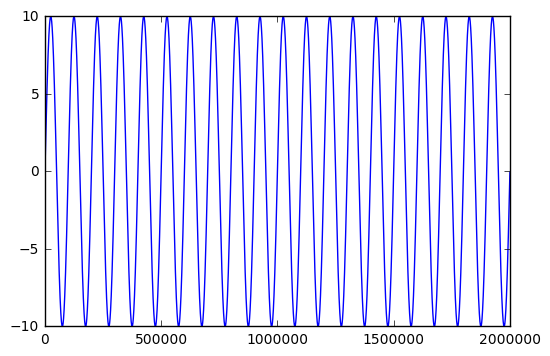

In [8]:
#sea_level_file(planform['sl_file_name'], planform)
plt.plot(t,sl_array)

In [9]:
#from netCDF4 import Dataset
#dataset = Dataset('netcdf_file_example.nc')
#read in the netcdf file go straight into a grid

In [10]:
#still need to input subsidence and sea level arrays calculate sea level tpe outside in sequence

In [11]:
from landlab import RasterModelGrid, CLOSED_BOUNDARY
number_of_node_columns = planform['number_of_node_columns']
dx = planform['dx']
grid = RasterModelGrid((3,number_of_node_columns), spacing = dx)
grid.status_at_node[grid.nodes_at_top_edge]    = CLOSED_BOUNDARY
grid.status_at_node[grid.nodes_at_bottom_edge] = CLOSED_BOUNDARY

In [12]:
z = create_initial_profile(grid.x_of_node)
grid.add_field('topographic__elevation', z.copy(), at='node')

array([ 15.8       ,  15.4       ,  15.        ,  14.6       ,
        14.2       ,  13.8       ,  13.4       ,  13.        ,
        12.6       ,  12.2       ,  11.8       ,  11.4       ,
        11.        ,  10.6       ,  10.2       ,   9.8       ,
         9.4       ,   9.        ,   8.6       ,   8.2       ,
         7.8       ,   7.4       ,   7.        ,   6.6       ,
         6.2       ,   5.8       ,   5.4       ,   5.        ,
         4.6       ,   4.2       ,   3.8       ,   3.4       ,
         3.        ,   2.6       ,   2.2       ,   1.8       ,
         1.4       ,   1.        ,   0.6       ,   0.2       ,
        -2.01254646,  -5.44066082,  -8.22107857, -10.4970697 ,
       -12.38021299, -13.95740606, -15.29632487, -16.4496755 ,
       -17.45850548, -18.35478266, -19.16340364, -19.90375791,
       -20.590946  , -21.23672823, -21.85026354, -22.43868493,
       -23.00754758, -23.56117787, -24.10294517, -24.63547359,
       -25.16080674, -25.68053622, -26.19590155, -26.70

In [13]:
z0 =z

19628.7477097
19628.7477097


19628.74770972907

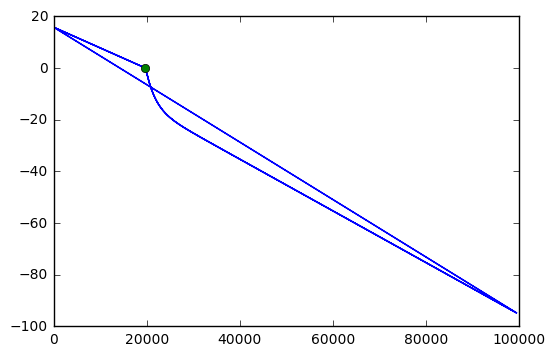

In [14]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z[grid.core_nodes], 0.)
plt.plot(grid.x_of_node,z,shore,0,'o' )
shore

19628.7477097
19628.7477097


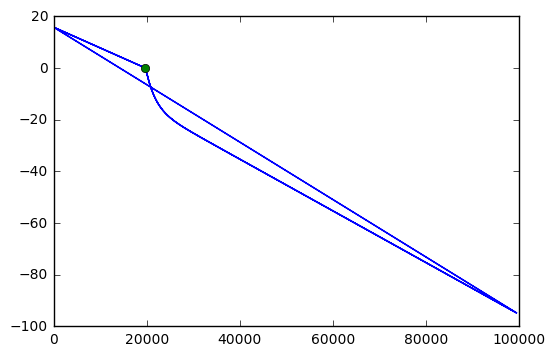

In [15]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z[grid.core_nodes], 0.)
plt.plot(grid.x_of_node,z,shore,0,'o' )

In [16]:
sd = SubmarineDiffuser(grid, shore,sl_array, planform)

In [17]:
k = sd.calc_diffusion_coef(shore)

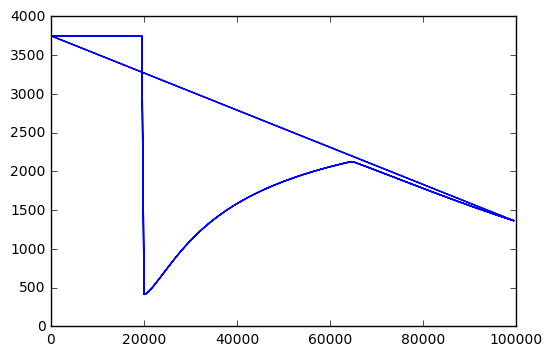

In [18]:
plt.plot(grid.x_of_node,k)

In [19]:
k = sd.grid.at_node['kd'].copy()
grid.x_of_cell[48]
sd.grid.at_node['topographic__elevation'][200] = sd.grid.at_node['topographic__elevation'][201]

In [20]:
len(sl_array)

20000

In [21]:
for time_step in range(10):
    sd.run_one_step(100)

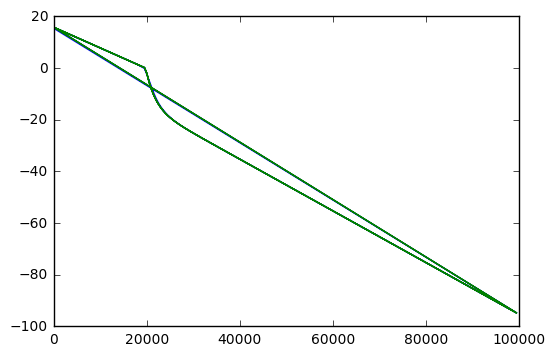

In [22]:
z1 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z)

In [23]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z1[grid.core_nodes], 0.)
shore

19154.6820995
19154.6820995


19154.682099455033

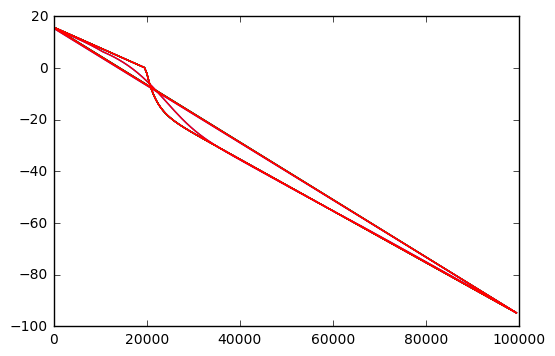

In [24]:
for time_step in range(100):
    sd.run_one_step(100)
    z2 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2)

In [25]:
z2

array([ 15.8       ,  15.4       ,  15.        ,  14.6       ,
        14.2       ,  13.8       ,  13.4       ,  13.        ,
        12.6       ,  12.2       ,  11.8       ,  11.4       ,
        11.        ,  10.6       ,  10.2       ,   9.8       ,
         9.4       ,   9.        ,   8.6       ,   8.2       ,
         7.8       ,   7.4       ,   7.        ,   6.6       ,
         6.2       ,   5.8       ,   5.4       ,   5.        ,
         4.6       ,   4.2       ,   3.8       ,   3.4       ,
         3.        ,   2.6       ,   2.2       ,   1.8       ,
         1.4       ,   1.        ,   0.6       ,   0.2       ,
        -2.01254646,  -5.44066082,  -8.22107857, -10.4970697 ,
       -12.38021299, -13.95740606, -15.29632487, -16.4496755 ,
       -17.45850548, -18.35478266, -19.16340364, -19.90375791,
       -20.590946  , -21.23672823, -21.85026354, -22.43868493,
       -23.00754758, -23.56117787, -24.10294517, -24.63547359,
       -25.16080674, -25.68053622, -26.19590155, -26.70

In [26]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z2[grid.core_nodes], 0.)
shore

16619.6889785
16619.6889785


16619.688978508624

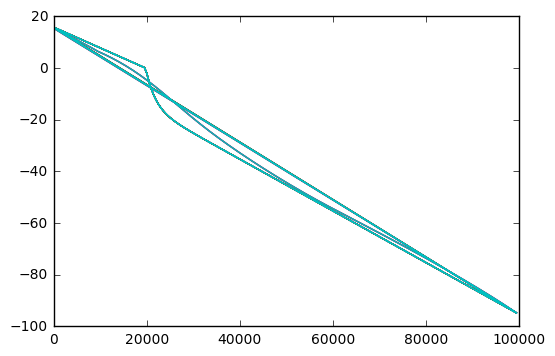

In [27]:
for time_step in range(1000):
    sd.run_one_step(100)
    z3 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2, grid.x_of_node,z3)

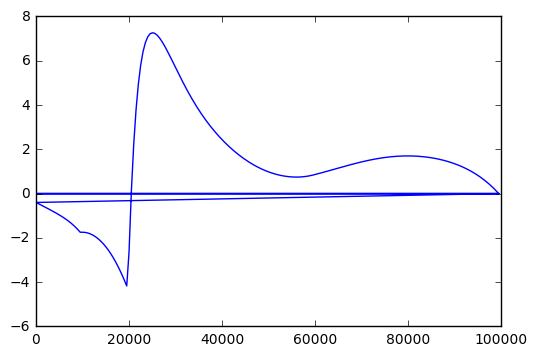

In [28]:
plt.plot(grid.x_of_node,z1-z)

In [29]:
z3

array([ 15.8       ,  15.4       ,  15.        ,  14.6       ,
        14.2       ,  13.8       ,  13.4       ,  13.        ,
        12.6       ,  12.2       ,  11.8       ,  11.4       ,
        11.        ,  10.6       ,  10.2       ,   9.8       ,
         9.4       ,   9.        ,   8.6       ,   8.2       ,
         7.8       ,   7.4       ,   7.        ,   6.6       ,
         6.2       ,   5.8       ,   5.4       ,   5.        ,
         4.6       ,   4.2       ,   3.8       ,   3.4       ,
         3.        ,   2.6       ,   2.2       ,   1.8       ,
         1.4       ,   1.        ,   0.6       ,   0.2       ,
        -2.01254646,  -5.44066082,  -8.22107857, -10.4970697 ,
       -12.38021299, -13.95740606, -15.29632487, -16.4496755 ,
       -17.45850548, -18.35478266, -19.16340364, -19.90375791,
       -20.590946  , -21.23672823, -21.85026354, -22.43868493,
       -23.00754758, -23.56117787, -24.10294517, -24.63547359,
       -25.16080674, -25.68053622, -26.19590155, -26.70

In [30]:
shore = find_shoreline2(grid.x_of_node[grid.core_nodes], z3[grid.core_nodes], 0.)
shore

16133.3077537
16133.3077537


16133.307753732866

In [31]:
shore1 = find_shoreline2(grid.x_of_node[grid.core_nodes], z2[grid.core_nodes], 0.)
shore1

16133.3077537
16133.3077537


16133.307753732866

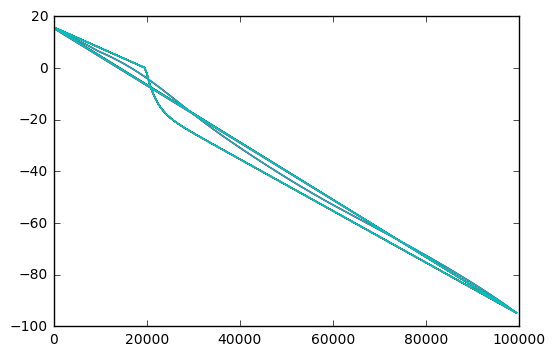

In [32]:
for time_step in range(1000):
    sd.run_one_step(100)
    z4 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1,grid.x_of_node,z, grid.x_of_node,z2, grid.x_of_node,z4)

In [33]:
k

array([ 3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
         417.3632702 ,   424.50736312,   450.14204973,   482.38443387,
         517.95830133,   555.4748895 ,   594.16575479,   633.5247561 ,
         673.18115874,   712.84723732,   752.29373475,   791.33677435,
         829.82978484,   867.65773446,   904.73250719,   940.98892227,
      

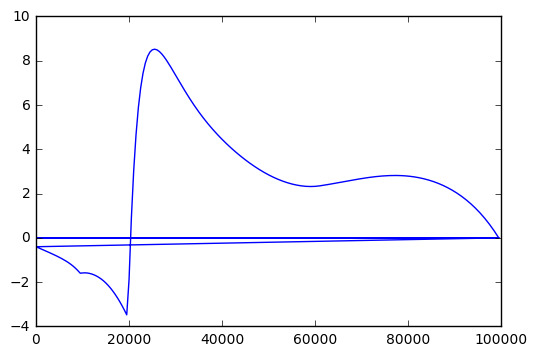

In [34]:
# z1 = sd.grid.at_node['topographic__elevation']
plt.plot(grid.x_of_node,z1-z,)

In [35]:
k1 = sd.grid.at_node['kd']
k1

array([ 3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        3750.        ,  3750.        ,  3750.        ,  3750.        ,
        6383.06782989,  6162.52910784,  5976.07870669,  5816.3801533 ,
        5678.06132248,  5557.09823872,  5450.41713968,  5355.62963429,
        5270.85176341,  5194.57750762,  5125.58854057,  5062.8886631 ,
        5005.65538689,  4953.20365283,  4904.95827827,  4860.43277741,
        4125.30797826,  3335.98845852,  2922.33029695,  2677.8822477 ,
        2523.55008396,  2422.45707346,  2355.06871714,  2310.06583069,
        2280.44260433,  2261.64206595,  2250.58553864,  2245.13168216,
        2243.75752896,  2245.36134421,  2249.13583545,  2254.48381793,
      

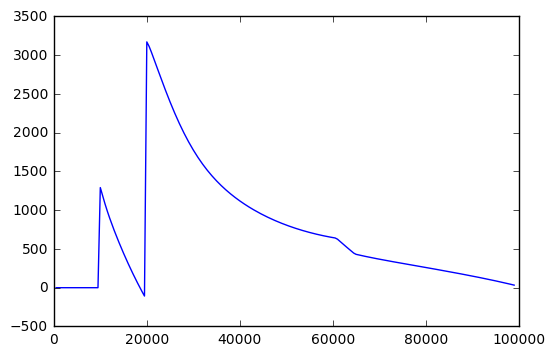

In [36]:
plt.plot(grid.x_of_node[grid.core_nodes],k1[grid.core_nodes]-k[grid.core_nodes],)

In [37]:
k1-k

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.63306783e+03,   2.41252911e+03,   2.22607871e+03,
         2.06638015e+03,   1.92806132e+03,   1.80709824e+03,
         1.70041714e+03,   1.60562963e+03,   1.52085176e+03,
         1.44457751e+03,   1.37558854e+03,   1.31288866e+03,
         1.25565539e+03,   1.20320365e+03,   1.15495828e+03,
         1.11043278e+03,   3.70794471e+03,   2.91148110e+03,
         2.47218825e+03,   2.19549781e+03,   2.00559178e+03,
         1.86698218e+03,   1.76090296e+03,   1.67654107e+03,
         1.60726145e+03,